## Data Visualization


### Programming for Data Science
### Last Updated: Dec 3, 2024
---

### Instructions

Use the **matplotlib**, **plotnine**, and **plotly**  packages to perform data analysis and create informative data visualizations on an educational dataset.  

- The dataset we will be using is a subset of a larger dataset collected by the Minneapolis Public School District (MPLS) in Minnesota, USA. 

- The variables in the data include student identifier (subid), reading achievement scores from grades 5 to 8, risk group (risk), gender (gen), ethnicity (eth), English language learner status (ell), special education services (sped), and attendance proportion (att).


Note that using **ChatGPT** to answer any of the questions in this programming assignment is strictly **prohibited**. This course aims to teach the basics of Python and other tools, and using ChatGPT to solve the assignment will hinder your ability to improve your essential programming skills. Violating this policy will result in an 80% deduction for the assignment.


### TOTAL POINTS: 12
---


In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from plotnine import *
import plotly.express as px

#### Read in the dataset on the Minneapolis Public School District (MPLS)

In [5]:
path_to_data = "https://github.com/tcsuk/hudm5001/raw/main/programming_assignments/python/82689_01ds2.csv"
df = pd.read_csv(path_to_data)
df.head(10)

,subid,read.5,read.6,read.7,read.8,risk,gen,eth,ell,sped,att
0,1,172,185,179,194,HHM,F,Afr,0,N,0.94
1,2,200,210,209,-99,HHM,F,Afr,0,N,0.91
2,3,191,199,203,215,HHM,M,Afr,0,N,0.97
3,4,200,195,194,-99,HHM,F,Afr,0,N,0.88
4,5,207,213,212,213,HHM,F,Afr,0,N,0.85
5,6,191,189,206,195,HHM,M,Afr,0,N,0.90
6,7,199,208,213,218,POV,M,Afr,1,N,0.97
7,8,191,194,194,-99,POV,F,His,1,Y,0.97
8,9,149,154,174,177,POV,F,Afr,0,Y,0.97
9,10,200,212,213,-99,POV,F,Afr,0,N,0.96


1. **(1 PT)** Create a barplot using the `seaborn` library to display the frequency distribution of gender (*gen*) variable. Add x-label, y-label, and title using functions from the `matplotlib` library.

Text(0.5, 1.0, 'Frequency Distribution of Gender')

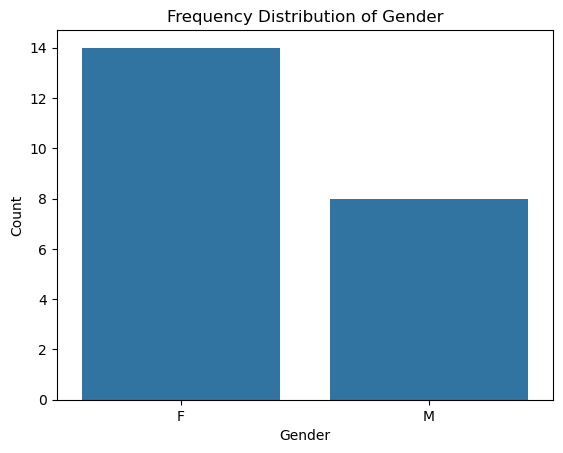

In [9]:
sns.countplot(x = "gen", data = df)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Frequency Distribution of Gender")

2. **(1 PT)** Create a set of boxplots that show the distribution of 5th-grade reading scores (*read.5*) by gender (*gen*), using `pandas` and `matplotlib` libraries. Customize the figure style as you like. Note that you can check a section of figure styles from `plt.style.available`.

Text(0, 0.5, 'Read.5')

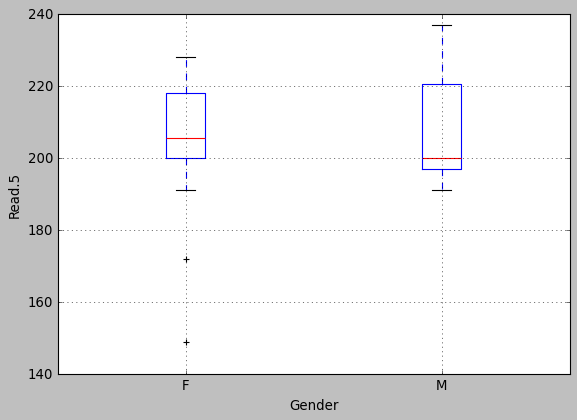

In [24]:
plt.style.use('classic')
df.boxplot(column = 'read.5', by = 'gen')
plt.title('')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('Read.5')

3. **(1 PT)** Use the `ggplot` function from the `plotnine` library to create a scatterplot to examine the relationship between the attendance proportion (*att*; x variable) and 5th-grade reading scores (*read.5*; y variable). Add x-label, y-label, and title, and a smoothing line using linear regression.

    Hints: use `geom_soomth()` to fit a smoother line.

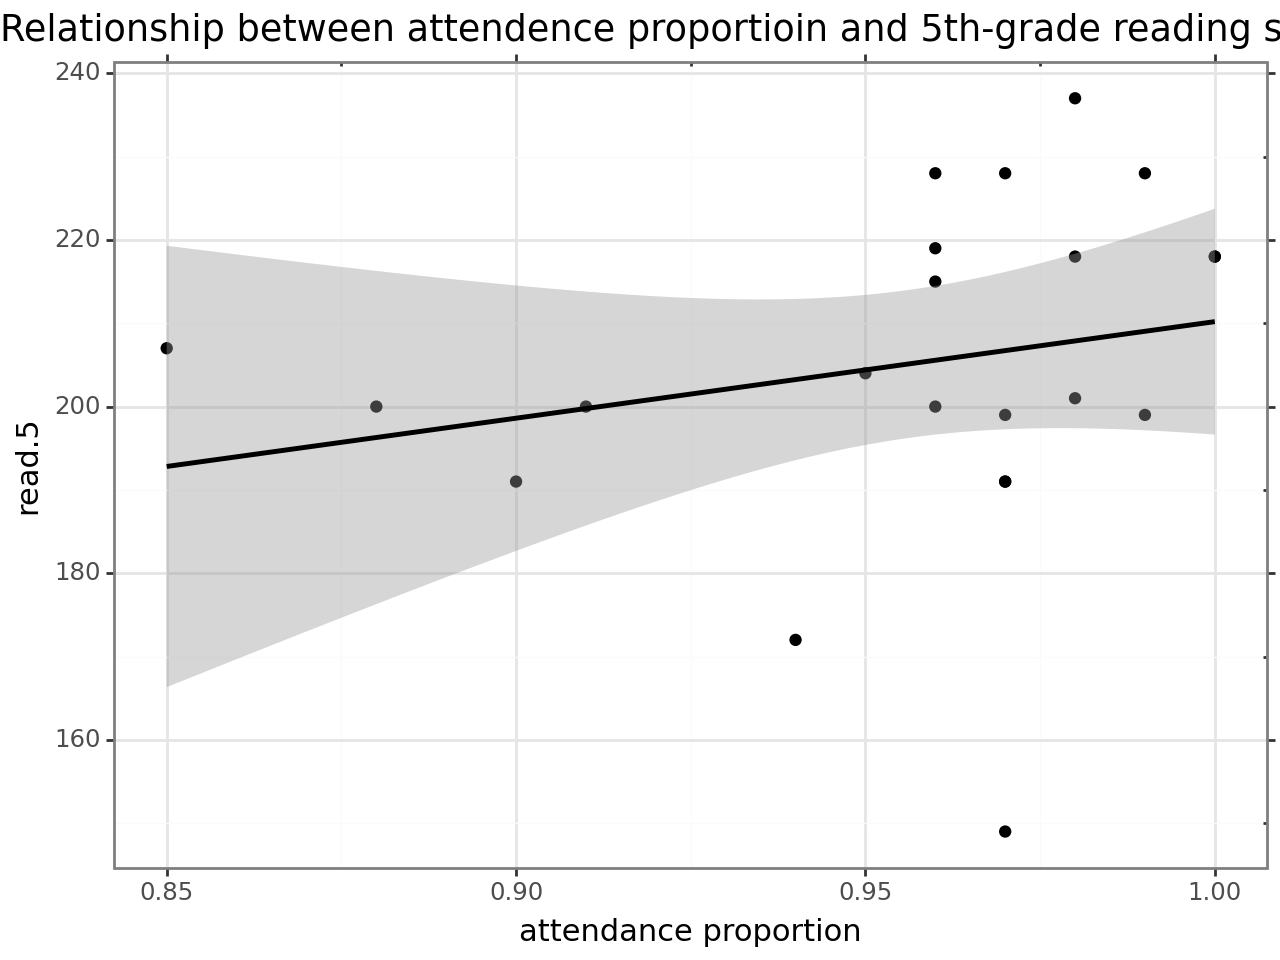

In [50]:
ggplot(df, aes(x = "att", y = "read.5")) + geom_point() + geom_smooth(method = 'lm')+ theme_bw() + labs(x = "attendance proportion", y="read.5", title="Relationship between attendence proportioin and 5th-grade reading scores")

4. **(1 PT)** Create a scatterplot using the `plotly` library to examine how attendance proportion (*att*; x variable) is related to the difference between 6th and 5th-grade reading scores (*read.6 - read.5*) and whether the relationship is different depending on ethnicity. 

C:\Users\HUAWEI\anaconda3\Lib\site-packages\plotnine\stats\stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.


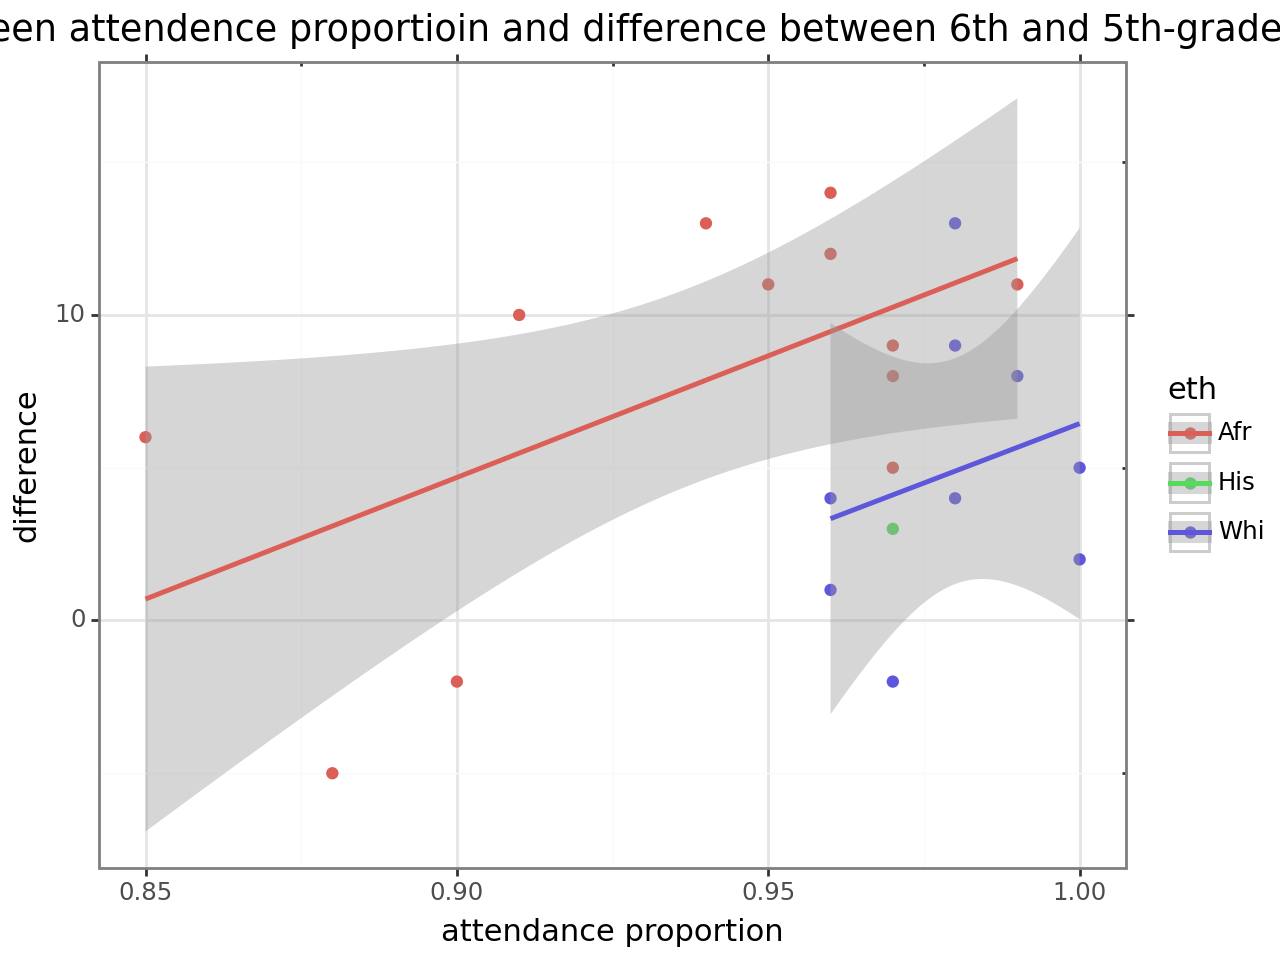

In [76]:
df["dif"] = df["read.6"] - df["read.5"]
ggplot(df, aes(x = "att", y = "df.dif", color = "eth")) + geom_point() + geom_smooth(method = 'lm') + theme_bw() + labs(x = "attendance proportion", y="difference", title="Relationship between attendence proportioin and difference between 6th and 5th-grade reading scores")

5. **(2 PT)** Create a set of scatterplots using facets functions from the `plotnine` library to display relations between attendance proportion (*att*) and each of the four reading scores. Values of -99 indicate missing values, so delete them when plotting. 

   Hints: you need to convert the wide-format data to long-format data. [pd.melt()](https://towardsdatascience.com/reshaping-a-pandas-dataframe-long-to-wide-and-vice-versa-517c7f0995ad#:~:text=Reshape%20from%20Wide%20to%20Long%3A&text=To%20reshape%20a%20dataframe%20from,%3D%2C%20value_name%3D%2C%20ignore_index%3D) from the `pandas` library can be used.

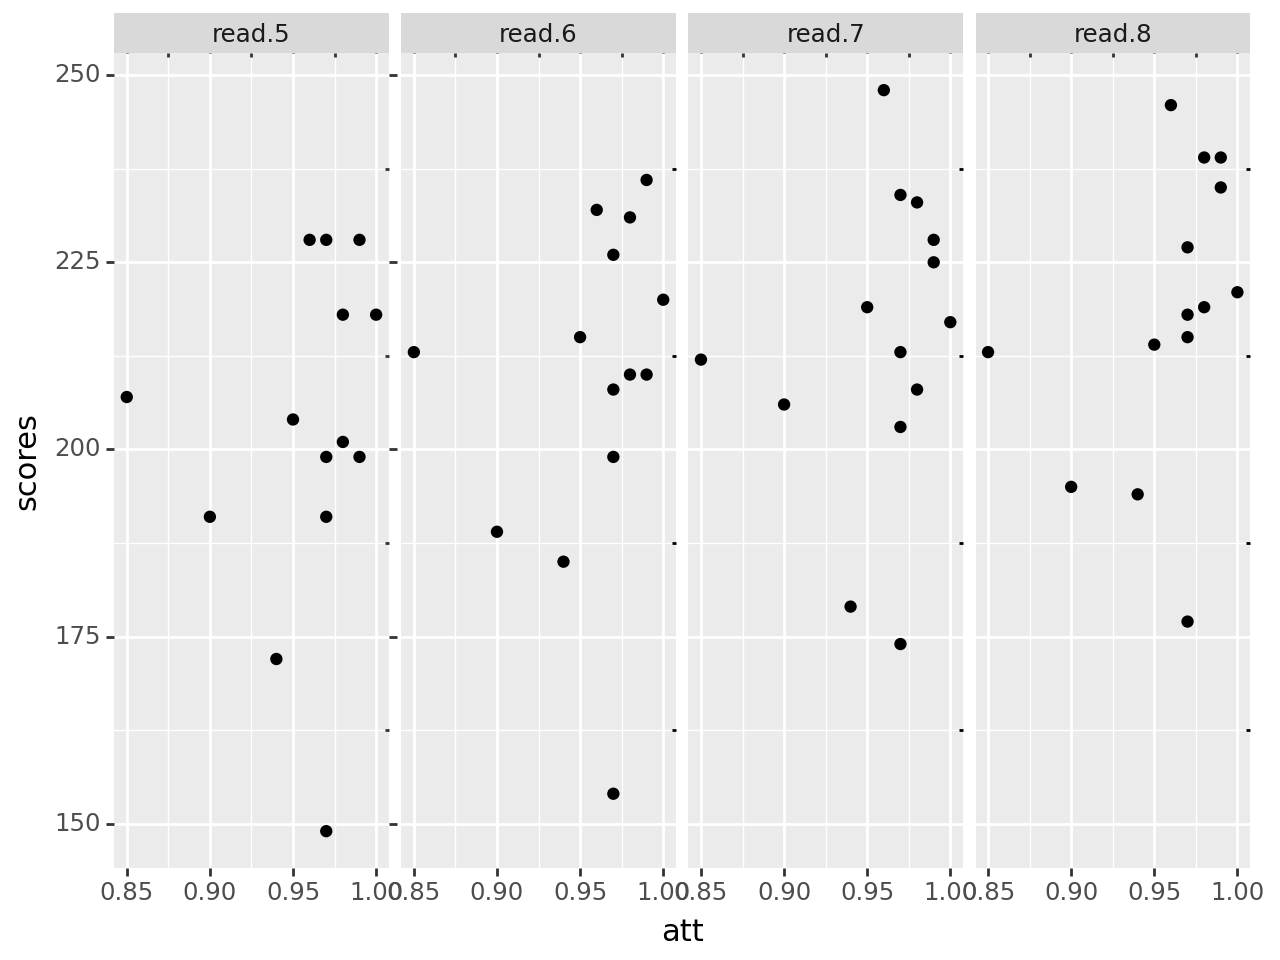

In [119]:
df_replaced = df.replace(-99, np.nan)
df_removed = df_replaced.dropna()
df_long = pd.melt(df_removed, id_vars= ['att'], value_vars=['read.5', 'read.6', 'read.7', 'read.8'], var_name='grade', value_name='scores', ignore_index= 'False')
ggplot(df_long, aes(x = "att", y = "scores")) + geom_point() + facet_grid("~ grade")

6. **(1 PT)** Use the long-format data created for Question 5 to create an animated scatter plot of attendance proportion (*att*) and reading scores by specifying the grades to be animated.

C:\Users\HUAWEI\anaconda3\Lib\site-packages\plotly\express\_core.py:1985: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



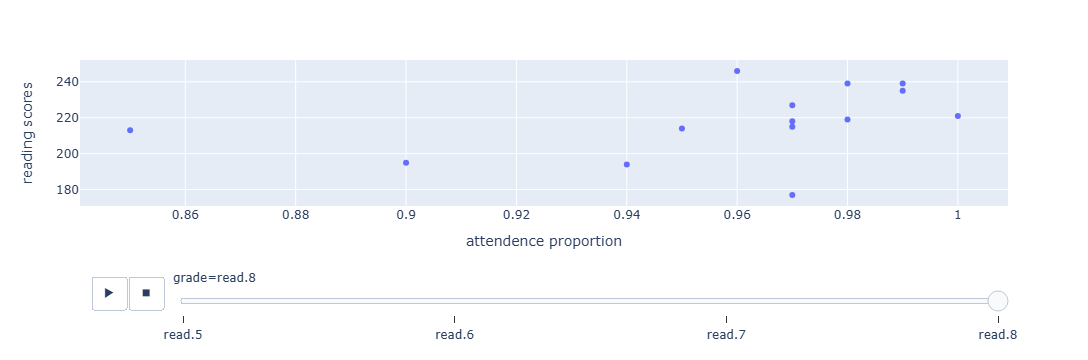

In [137]:
p = px.scatter(df_long, x = 'att', y = 'scores', animation_frame = "grade", labels = {'att': 'attendence proportion', 'scores': 'reading scores'})
p.show()

7. **(2 PT)**  Use 6th grader's reading scores (read.6) to create the following four subplots, using fuctions from the `plotnine` library. 

- a histogram of 'read.6',
- a kernel density estimate,
- a boxplot of 'read.6',
- a set of boxplots showing the distribution of 'read.6' by 'eth' crossed with 'gen', where different color indicates each unique group by 'eth' and 'gen'.

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_7252\110604464.py:5: FutureWarning:

Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().



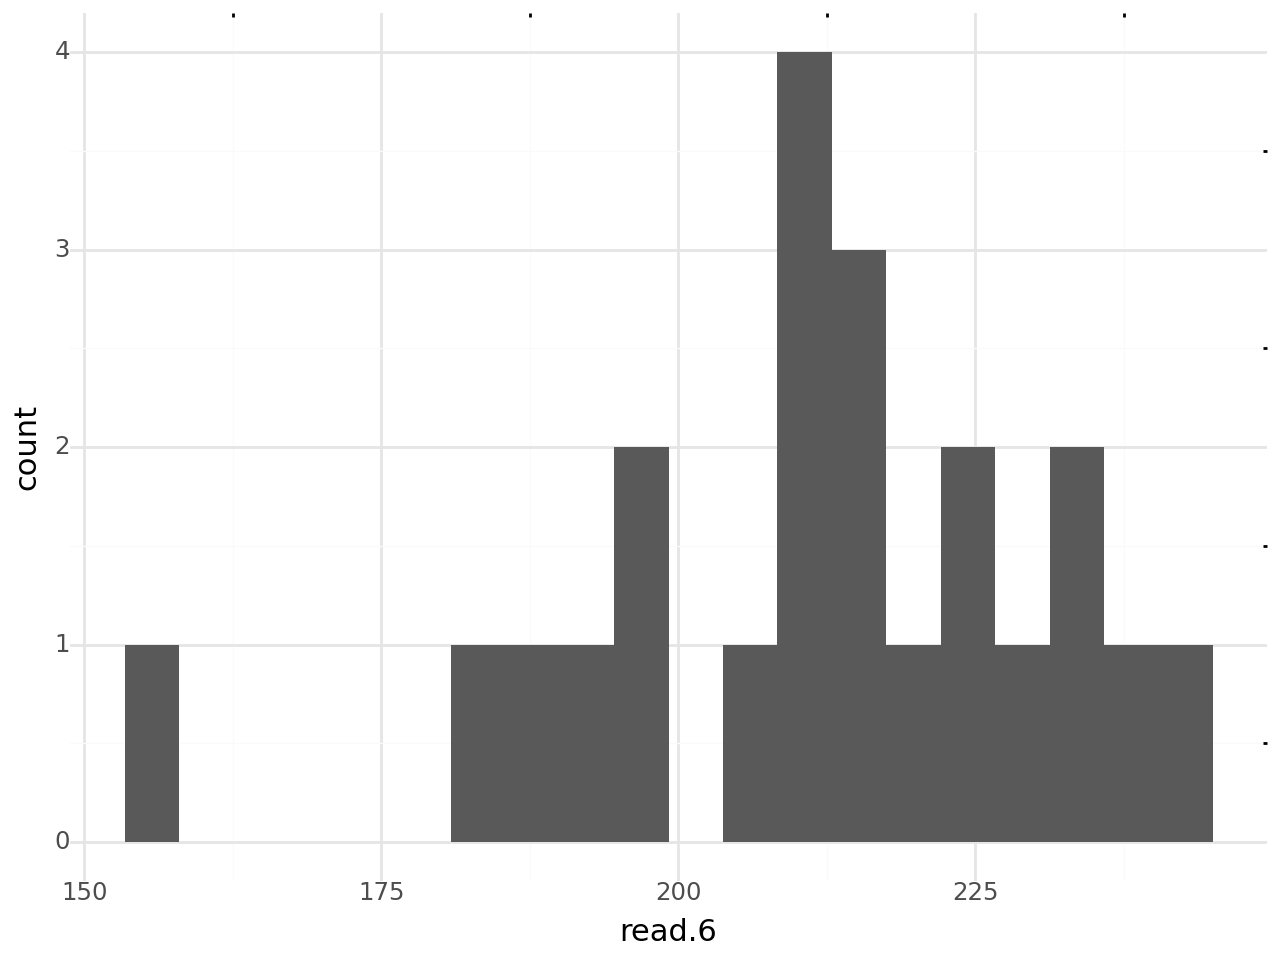

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_7252\110604464.py:5: FutureWarning:

Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().



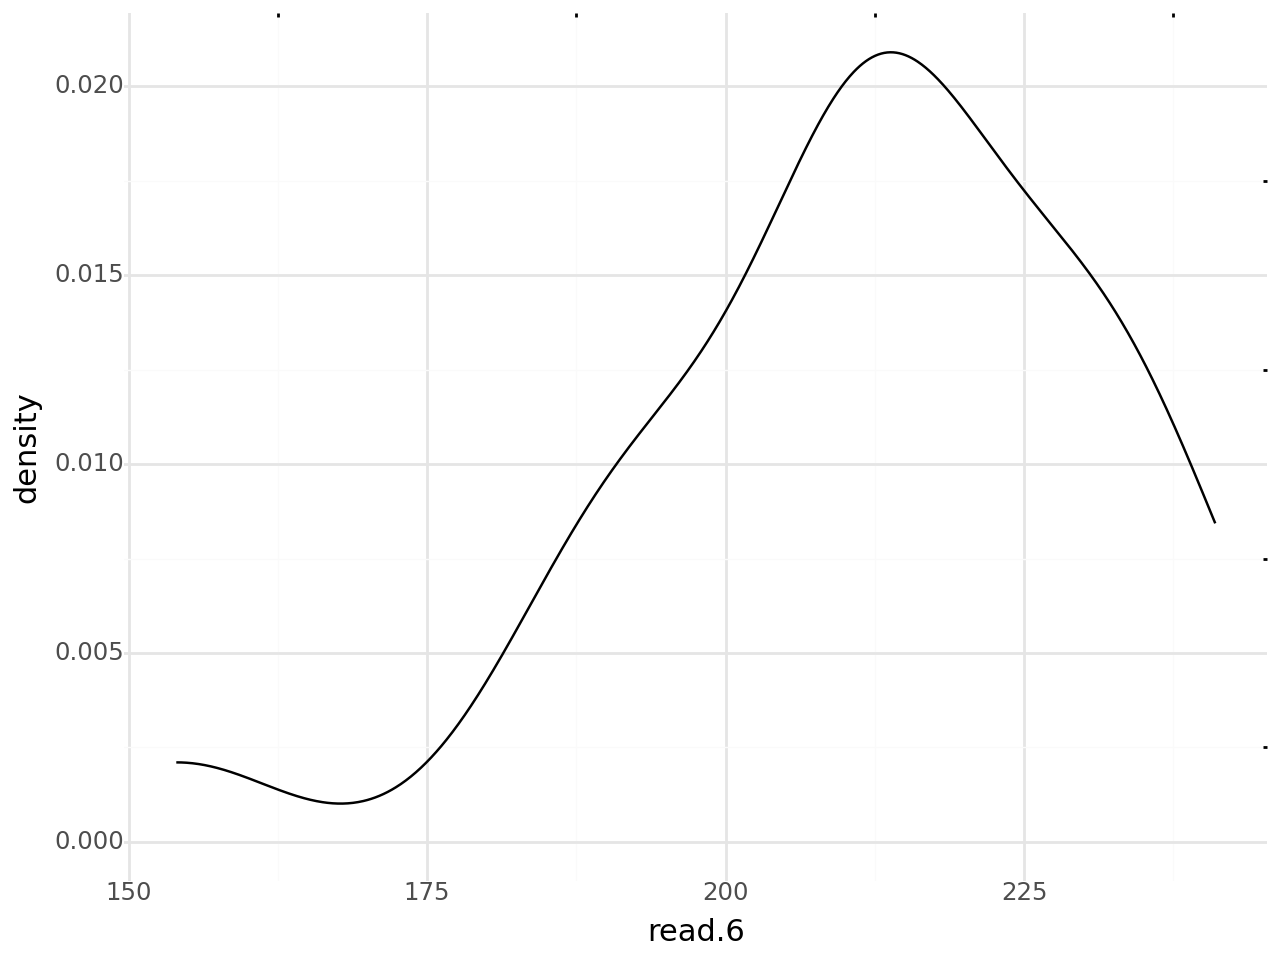

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_7252\110604464.py:5: FutureWarning:

Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().



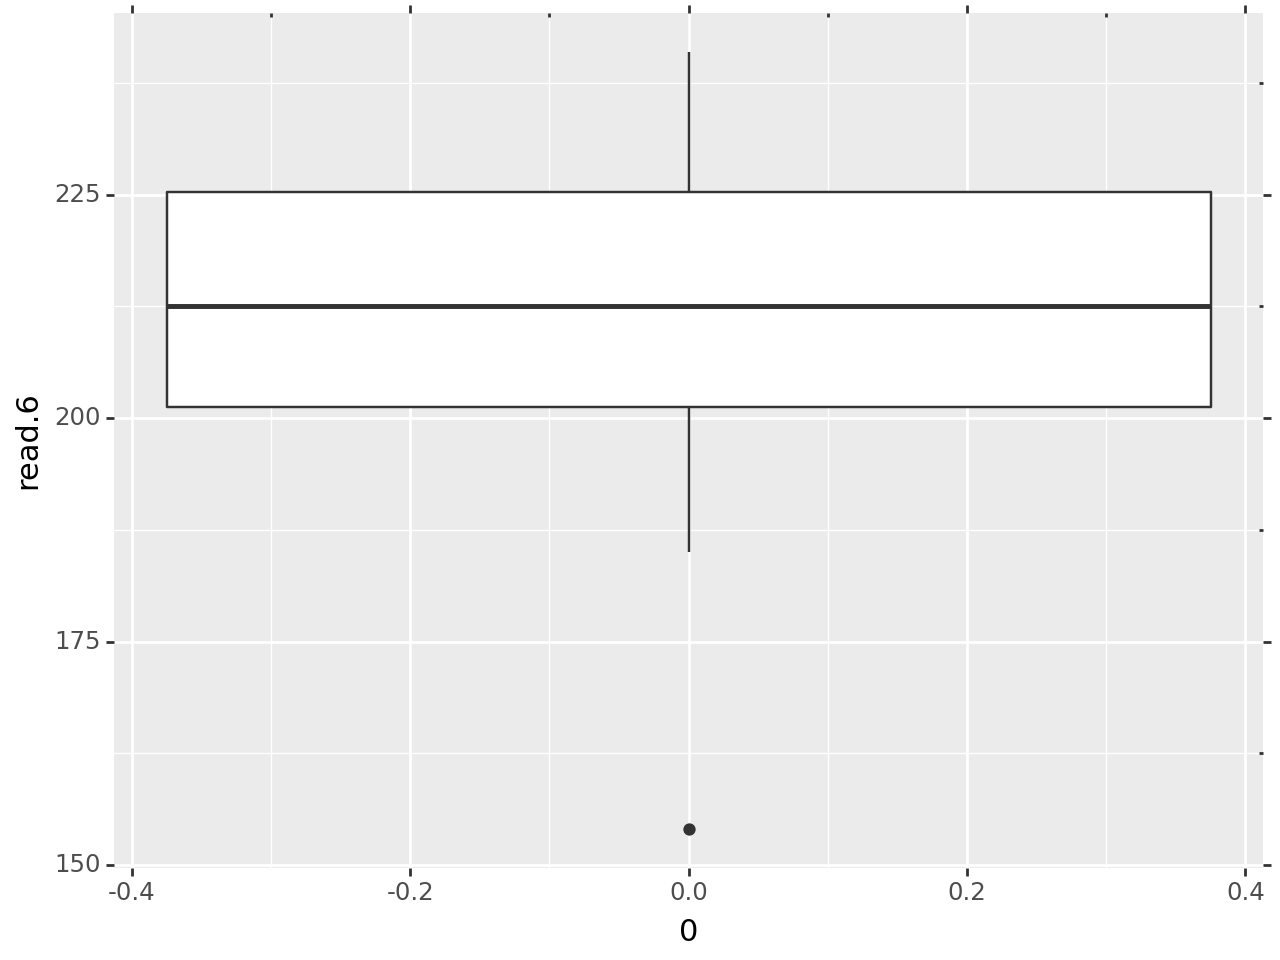

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_7252\110604464.py:5: FutureWarning:

Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().



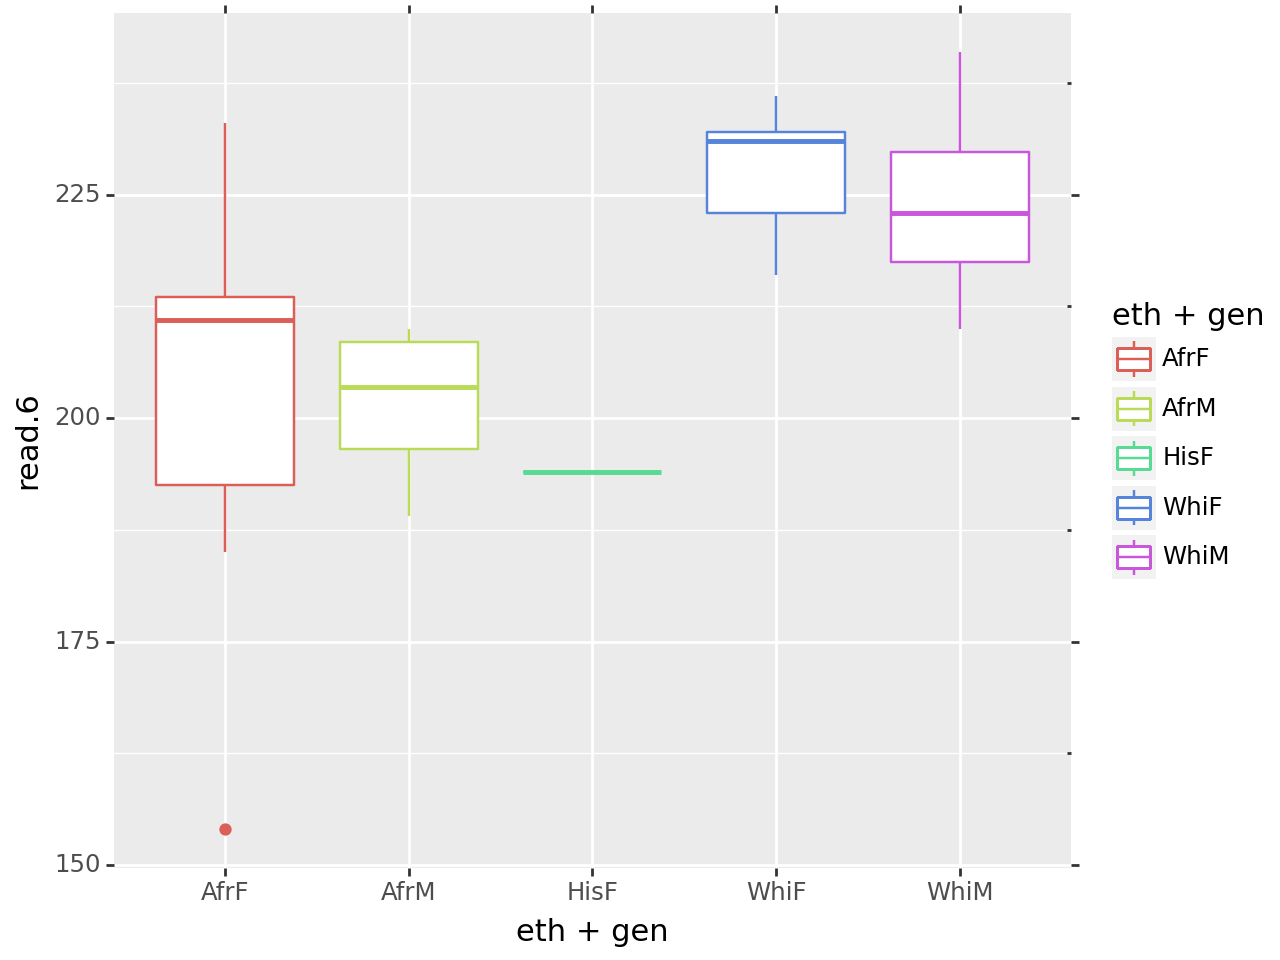

In [229]:
histogram = ggplot(df) + geom_histogram(aes(x = "read.6"), bins = 20) + theme_minimal()
density = ggplot(df) + geom_density(aes(x = "read.6")) + theme_minimal()
boxplot = ggplot(df) + geom_boxplot(aes(x = 0, y = "read.6"))
boxplot_set = ggplot(df, aes(x ="eth + gen", y = "read.6", color = 'eth + gen')) + geom_boxplot()
print(histogram, density, boxplot, boxplot_set)

8. **(2 PT)** Create a line plot to show the average trend over grades by gender. Draw two lines where one indicates the male-specific average trend and the other indicates the female-specific average trend. You can use any function to draw a line plot.

C:\Users\HUAWEI\anaconda3\Lib\site-packages\plotly\express\_core.py:1985: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



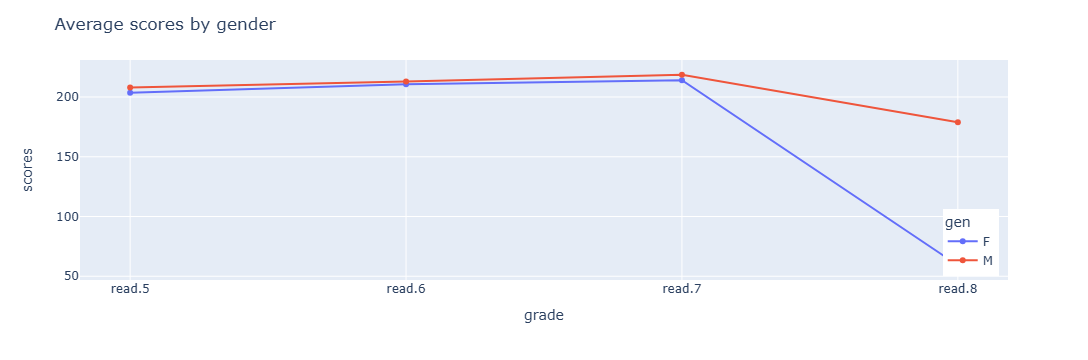

In [327]:
df_group = df.groupby(['gen'])[['read.5', 'read.6', 'read.7', 'read.8']].mean().reset_index()
df_group_long = pd.melt(df_group, id_vars= ['gen'], value_vars=['read.5', 'read.6', 'read.7', 'read.8'], var_name='grade', value_name='scores', ignore_index= 'False')
p = px.line(df_group_long, x="grade", y="scores", color='gen')
p.update_layout(
    legend=dict(
    yanchor="bottom",
    y=0.02,
    xanchor="right",
    x=0.99)
    ,title='Average scores by gender')
p.update_traces(mode="lines+markers")

9. **(1 PT)** Create a sunburst plot based on any available information online, using the `plotly` library. Provide the source URL and import the dataset or create a dataset properly. You also need to briefly describe the variables used in the plot.

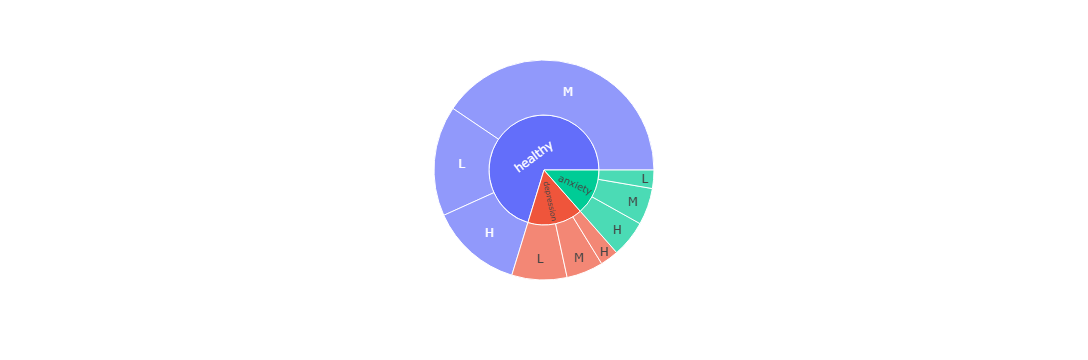

In [296]:
#create a dataset
grade = pd.DataFrame({
    'mental': ['healthy','healthy','healthy', 'depression','depression', 'depression', 'anxiety', 'anxiety', 'anxiety'], #describe the mental health status of students
    'level': ['H', 'M', 'L', 'H', 'M', 'L', 'H', 'M', 'L'], #describe the level in each mental health status, 'H' means high, 'M' means middle, 'L' means low
    'number_of_students': [5, 15, 6, 1, 2, 3, 2, 2, 1]
})


px.sunburst(grade, path=['mental', 'level'],
            values='number_of_students')
#this sunburst plot describes the mental status of a 6-th grade class students

---